In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [2]:
# path to json
DATA_PATH = "data_11.json"

In [3]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [4]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(9986, 130, 13)

In [6]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
219/219 [==============================] - 4s 10ms/step - loss: 12.5919 - accuracy: 0.2664 - val_loss: 2.6075 - val_accuracy: 0.2644
Epoch 2/50
219/219 [==============================] - 2s 8ms/step - loss: 2.2317 - accuracy: 0.2722 - val_loss: 2.0512 - val_accuracy: 0.3114
Epoch 3/50
219/219 [==============================] - 2s 8ms/step - loss: 1.8377 - accuracy: 0.3916 - val_loss: 1.9253 - val_accuracy: 0.3818
Epoch 4/50
219/219 [==============================] - 2s 8ms/step - loss: 1.7139 - accuracy: 0.4323 - val_loss: 1.8229 - val_accuracy: 0.4142
Epoch 5/50
219/219 [==============================] - 2s 9ms/step - loss: 1.6044 - accuracy: 0.4511 - val_loss: 1.8516 - val_accuracy: 0.3925
Epoch 6/50
219/219 [==============================] - 2s 8ms/step - loss: 1.5354 - accuracy: 0.4796 - val_loss: 1.8009 - val_accuracy: 0.4259
Epoch 7/50
219/219 [==============================] - 2s 8ms/step - loss: 1.4352 - accuracy: 0.5020 - val_loss: 1.7247 - val_accuracy: 0.4516
Epoc

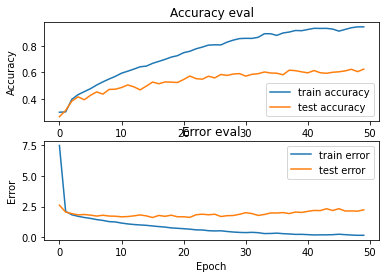

In [38]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
# plot accuracy and error as a function of the epochs
plot_history(history)

In [31]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)
# plot accuracy and error as a function of the epochs
plot_history(history)

Epoch 1/100
219/219 [==============================] - 6s 17ms/step - loss: 41.8890 - accuracy: 0.1365 - val_loss: 3.4089 - val_accuracy: 0.1893
Epoch 2/100
219/219 [==============================] - 3s 14ms/step - loss: 6.9110 - accuracy: 0.1492 - val_loss: 3.4745 - val_accuracy: 0.1255
Epoch 3/100
219/219 [==============================] - 3s 14ms/step - loss: 4.5020 - accuracy: 0.1263 - val_loss: 3.4711 - val_accuracy: 0.1305
Epoch 4/100
219/219 [==============================] - 3s 14ms/step - loss: 3.8674 - accuracy: 0.1218 - val_loss: 3.4677 - val_accuracy: 0.1268
Epoch 5/100
219/219 [==============================] - 3s 14ms/step - loss: 3.7619 - accuracy: 0.1300 - val_loss: 3.4848 - val_accuracy: 0.1158
Epoch 6/100
219/219 [==============================] - 3s 14ms/step - loss: 3.5918 - accuracy: 0.1205 - val_loss: 3.4434 - val_accuracy: 0.1355
Epoch 7/100
219/219 [==============================] - 3s 14ms/step - loss: 3.5712 - accuracy: 0.1322 - val_loss: 3.4338 - val_accuracy

KeyboardInterrupt: 

In [7]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [8]:
X_train.shape

(5991, 130, 13, 1)

In [9]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [49]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [50]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 1, 32)        

In [51]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 9s 41ms/step - loss: 2.4938 - accuracy: 0.1882 - val_loss: 1.7528 - val_accuracy: 0.3905
Epoch 2/50
188/188 [==============================] - 8s 40ms/step - loss: 1.8568 - accuracy: 0.3566 - val_loss: 1.5120 - val_accuracy: 0.4680
Epoch 3/50
188/188 [==============================] - 8s 41ms/step - loss: 1.6420 - accuracy: 0.4240 - val_loss: 1.3948 - val_accuracy: 0.5100
Epoch 4/50
188/188 [==============================] - 8s 42ms/step - loss: 1.4958 - accuracy: 0.4645 - val_loss: 1.3091 - val_accuracy: 0.5194
Epoch 5/50
188/188 [==============================] - 8s 43ms/step - loss: 1.4376 - accuracy: 0.4854 - val_loss: 1.2466 - val_accuracy: 0.5574
Epoch 6/50
188/188 [==============================] - 8s 43ms/step - loss: 1.3596 - accuracy: 0.5061 - val_loss: 1.1911 - val_accuracy: 0.5728
Epoch 7/50
188/188 [==============================] - 8s 41ms/step - loss: 1.2718 - accuracy: 0.5451 - val_loss: 1.1494 - val_accuracy: 0.5941

In [ ]:
plot_history(history)

In [ ]:
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
model_cnn.save("Music_Genre_10_CNN")

In [ ]:
model_cnn.save("Music_Genre_10_CNN.h5")
# It can be used to reconstruct the model identically.


In [11]:
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

In [12]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]
X_to_predict.shape

(130, 13, 1)

In [13]:
print("Real Genre:", y_to_predict)

Real Genre: 5


In [42]:
 #add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)
X_to_predict.shape

(1, 130, 13)

In [14]:
prediction = reconstructed_model.predict(X_to_predict)
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

ValueError: in user code:

    c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:239 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 13, 1)


In [15]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = reconstructed_model.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 7
Predicted Genre: 7


In [16]:
len(X_test)

2497

In [18]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = reconstructed_model.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 5
Predicted Genre: 5

Real Genre: 4
Predicted Genre: 4

Real Genre: 5
Predicted Genre: 5

Real Genre: 0
Predicted Genre: 0

Real Genre: 9
Predicted Genre: 9

Real Genre: 8
Predicted Genre: 8

Real Genre: 8
Predicted Genre: 8

Real Genre: 6
Predicted Genre: 6

Real Genre: 8
Predicted Genre: 8

Real Genre: 7
Predicted Genre: 7


In [ ]:
test=[]
predictions=[]
ar=['blues',  'classical', 'country',  'disco',  'hiphop', 'jazz',  'metal',  'pop',  'reggae',  'rock']
dict={0:'blues',1:'classical',2:'country',3:'disco',4: 'hiphop',5:'jazz',6:'metal',7:'pop',8:'reggae',9:'rock'}

for i in range(len(X_test)):

  #i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  predictions.append(dict[y_to_predict])

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = reconstructed_model.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)
  
  test.append(dict[int(predicted_index)])
  #print("Predicted Genre:", int(predicted_index))
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('CONFUSION MATRIX')


#print(test)
#print(predictions)

print(classification_report(test, predictions))
conf_matrix = confusion_matrix(y_true=test, y_pred=predictions,labels=ar)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
im = ax.imshow(conf_matrix)
ax.set_xticklabels(['blues',  'classical', 'country',  'disco',  'hiphop', 'jazz',  'metal',  'pop',  'reggae',  'rock'])
ax.set_yticklabels(['blues',  'classical', 'country',  'disco',  'hiphop', 'jazz',  'metal',  'pop',  'reggae',  'rock'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right"
        )
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j],va='center', ha='center',color="w")
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
fig.tight_layout()
plt.show()